In [ ]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Loading the Dataset

In [ ]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [ ]:
df.head(5) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail(5) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# Labeled Data : Heart Failure (Heart Disease)
Heart failure: 1
Heart Failure not : 0

Column Descriptions: Age, Gender, Chest pain type, Resting Blood Pressure, Cholesterol, Fasting Blood Glucose, Electrocardiogram, Maximum Heart Rate, Exercise-induced angina, ST, Heart failure

# Data Preprocessing

In [ ]:
df.info() # checking variable types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum() # Checking missing data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum() # Are there any duplicate values?

0

In [ ]:
df.shape  # Dataset content

(918, 12)

In [ ]:
df.columns #column content

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# We listed the categorical and numerical features in the dataset.

In [ ]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
     Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
Numerical features:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130       

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Number of patients with heart disease versus those without

# We observe that the data set is balanced.

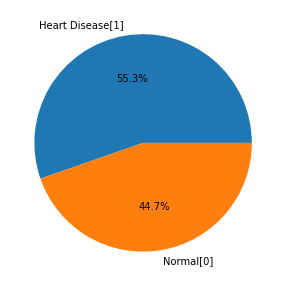

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

In [ ]:
corr_matx=df.corr()
corr_matx['HeartDisease']

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

 We looked at the correlation coefficients between the numerical characteristics of the patients and the HeartDisease target column

Here we observe that all numerical features are strongly associated with the presence of heart disease.

In [ ]:
# The categorical data was digitized.
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()

# Categorical data was digitized.

In [ ]:
df['Sex']= label_encoder.fit_transform (df['Sex'])
df['ChestPainType']= label_encoder.fit_transform (df['ChestPainType'])
df['RestingECG']= label_encoder.fit_transform (df['RestingECG'])
df['ExerciseAngina']= label_encoder.fit_transform (df['ExerciseAngina'])
df['ST_Slope']= label_encoder.fit_transform (df['ST_Slope'])

In [ ]:
df.head()  #We digitized categorical data.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Normalization Process

We perform normalization to bring the data closer to the values ​​of 0 and 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaler.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0


# Splitting the Dataset

In [ ]:
x=df.drop(['HeartDisease'], axis=1) # Unlabeled data
y=df['HeartDisease'] #Label

In [ ]:
x #Unlabeled Data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,0,1,-0.188999,0,0.293283,1
914,1.536902,1,0,0.627078,-0.053049,1,1,0.164684,0,2.357094,1
915,0.370100,1,0,-0.129513,-0.620168,0,1,-0.857069,1,0.293283,1
916,0.370100,0,1,-0.129513,0.340275,0,0,1.461525,0,-0.832432,1


In [ ]:
y #Tagged Data (Heart Disease)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# X_train , y_train , X_test , y_test and val division -

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=1)

# 1. Implementation of Logistic Regression Algorithm

Logistic regression is a data analysis technique that uses mathematics to find relationships between two data factors. Logistic regression then uses this relationship to predict the value of one of those factors based on the other.

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0) #yöntemi ekleme

random_state : takes integer value. It is used to always get the same results from randomly distributed data.

In [ ]:
log.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=log.predict(x_test)

In [ ]:
# Confusion matrix display
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[66 12]
 [ 8 98]]


In [ ]:
# Writing metric values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        74
           1       0.92      0.89      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



We observe 12 FN predictions and 0.89 accuracy based on regression classification. We add other algorithms to get better results.

#  2 .Implementation of Decision Tree Algorithm

Decision trees – a classification method that creates a model in the form of a tree structure consisting of decision nodes and leaf nodes according to the classification, feature and goal. The decision tree algorithm is developed by dividing the dataset into smaller and even smaller pieces. A decision node may have one or more branches. The first node is called the root node. A decision tree may consist of both categorical and numerical data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier() 

In [ ]:
classifier.fit(x_train, y_train) #Creating the Decision Tree Model

DecisionTreeClassifier()

In [ ]:
y_pred=classifier.predict(x_test) #make a guess

In [ ]:
cm=confusion_matrix(y_pred,y_test) #Confusion matrix draving
print(cm)

[[60 28]
 [14 82]]


In [ ]:
print(classification_report(y_test, y_pred)) #write the metrics

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        74
           1       0.85      0.75      0.80       110

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.77      0.77       184



According to the Decision Tree classification, we observe 28 FN predictions and 0.77 accuracy. We can say that the lowest success rate is in this algorithm.

#  3 .Implementation of SVM Algorithm

Support Vector Machines (SVM) is one of the supervised learning methods generally used in classification problems. It draws a line to separate points placed on a plane. It aims for this line to be at the maximum distance for points of both classes. It is suitable for complex but small and medium-sized data sets.

In [ ]:
from sklearn.svm import SVC
svm=SVC() #Add method

In [ ]:
svm.fit(x_train , y_train) #Creating the SVM Model

SVC()

In [ ]:
y_pred=svm.predict(x_test) #Make a guess

In [ ]:
cm=confusion_matrix(y_test, y_pred) #Confusion matrix drawing
print(cm)

[[ 64  10]
 [  9 101]]


In [ ]:
print(classification_report(y_test, y_pred)) #write the metrics

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



According to the SVM Algorithm, we observe 10 FN predictions and 0.90 accuracy. In this case, we can say that our classification is more successful in this algorithm.

#  4 .RandomForest Classification

The algorithm aims to increase the classification value during the classification process by producing multiple decision trees. The random forest algorithm is the process of selecting the highest scoring value among many decision trees that work independently of each other.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0) #Add method

In [ ]:
model.fit(x_train ,y_train) #RandomForest model creation
y_pred=model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test, y_pred) #Confusion matrix drawing
print(cm)

[[63 11]
 [11 99]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.8804347826086957


In [ ]:
print(classification_report(y_test, y_pred))  #write the metrics


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        74
           1       0.90      0.90      0.90       110

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



 We observe 11 FN predictions and 0.88 accuracy based on Random Forest classification.

# 5. Implementation of KNN Algorithm

KNN, in its simplest sense, is based on predicting the class of the value to be predicted based on the information in which class the nearest neighbors of the vector formed by the independent variables are dense.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train) #Knn model creation
KNN_predictions = KNN_model.predict(x_test)

print(confusion_matrix(y_test,KNN_predictions)) #Confusion matrix drawing
print(classification_report(y_test,KNN_predictions)) #write the metrics

[[62 12]
 [22 88]]


              precision    recall  f1-score   support

           0       0.74      0.84      0.78        74
           1       0.88      0.80      0.84       110

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



Confusion Matrix is ​​shown as 2x2 in the above output.

We observe 12 FN predictions and 0.82 accuracy based on K = 1. Let’s try to optimize the KNN model by finding the best K value. This can be found using the elbow method:

In [ ]:
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(x_train,y_train)
    pred_i = KNN_model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

* By creating an error table, we aim to reduce the FN estimate and increase accuracy by taking a new K value as the minimum error value.

Text(0, 0.5, 'Error Rate')

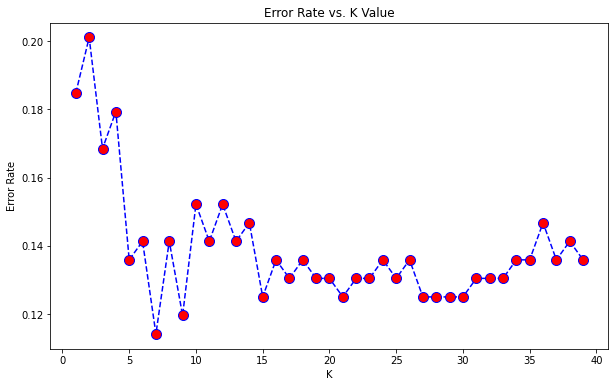

In [ ]:
#Hata Tablosu oluşturma
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The optimum K value is now 7. We improve this situation by setting the new K value to 7.

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=7)

KNN_model.fit(x_train,y_train)
KNN_predictions = KNN_model.predict(x_test)

print(confusion_matrix(y_test,KNN_predictions))
print('\n')
print(classification_report(y_test,KNN_predictions))

[[65  9]
 [12 98]]


              precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.92      0.89      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



We see that our model is now better than before. The number of FN estimates decreases by 3 and as a result of K: 7, FN: 9, Accuracy: 0.89. And we achieve the same success as the logistic regression algorithm.

#   ⚖️ Classification Report

> TP (True Positive) is a set of correct predictions that are true when the label is True and predicted as True

> TN (True Negative) is a set of correct predictions that are false when the label is False and predicted as False

> FP (False Positive) is a set of incorrect predictions that are false when the label is False but predicted as True

> FN (False Negative) is a set of incorrect predictions that are true when the label is True but predicted as False

> Precision is the accuracy of positive predictions Precision represents the percentage of correct predictions In other words, it is the ability to label an image as positive but not actually label it as negative. Precision is calculated by the following equation: Precision = TP

> Recall is the fraction of positive predictions among all True examples In other words, it is the ability to find all positive examples. Recall is calculated by the following equation: Recall = TP / (TP + FN)

> F1 Score is the so-called weighted harmonic average of Precision and Recall. Since F1 score includes Precision and Recall in its calculation and therefore includes the contributions of Precision and Recall to F1, it is also known as balanced F-score or F-measure. -score is equal to F1-score reaches its best value at 1 and worst score at 0. F1-score is calculated by the following equation: F1-score = 2 (Recall Precision)

> Support is the number of occurrences of each class in a dataset.

> Accuracy is a global accuracy of the entire classifier. Accuracy is calculated by the following equation: Accuracy = (TP + TN) / (TP + TN + FP + FN) (all correct / all)